In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

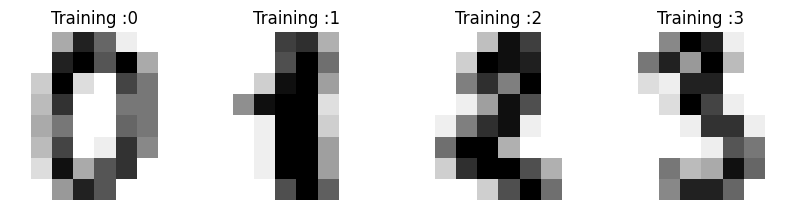

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training :%i" % label)

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape


(64,)

In [ ]:
data.shape


(1797, 64)

In [ ]:
#scaling image data
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

0.0625

In [ ]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

In [ ]:
#Train Test Split Data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
#predict Test Data
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([2, 5, 2, 7, 1, 6, 9, 6, 1, 4, 2, 9, 0, 3, 4, 9, 9, 7, 9, 1, 0, 4,
       9, 0, 7, 2, 7, 4, 5, 0, 4, 6, 1, 1, 3, 7, 0, 3, 7, 9, 0, 4, 9, 7,
       6, 6, 9, 0, 2, 6, 5, 9, 9, 8, 6, 3, 9, 2, 6, 5, 8, 5, 5, 5, 2, 3,
       4, 2, 7, 0, 5, 0, 3, 0, 2, 5, 7, 6, 0, 9, 8, 5, 2, 6, 0, 3, 0, 6,
       0, 2, 1, 7, 9, 8, 4, 3, 7, 4, 9, 2, 9, 6, 0, 3, 2, 5, 5, 1, 1, 9,
       1, 5, 1, 0, 4, 6, 8, 9, 4, 3, 4, 2, 9, 4, 5, 7, 7, 3, 4, 6, 9, 1,
       0, 5, 1, 8, 9, 7, 4, 8, 5, 7, 0, 0, 7, 3, 5, 0, 3, 6, 1, 8, 4, 3,
       7, 8, 6, 5, 3, 7, 9, 2, 9, 2, 2, 4, 5, 0, 1, 5, 5, 4, 6, 5, 9, 0,
       0, 9, 2, 8, 5, 3, 0, 4, 3, 9, 4, 4, 9, 4, 1, 1, 7, 4, 8, 4, 2, 1,
       5, 1, 4, 8, 5, 0, 9, 5, 1, 7, 2, 5, 0, 4, 2, 9, 7, 4, 1, 4, 7, 3,
       2, 3, 6, 3, 7, 0, 6, 3, 5, 5, 7, 2, 6, 9, 9, 8, 9, 9, 7, 4, 1, 6,
       2, 3, 9, 8, 8, 4, 5, 2, 7, 7, 8, 7, 1, 2, 9, 1, 8, 4, 1, 3, 1, 1,
       5, 1, 7, 8, 8, 7, 5, 3, 9, 2, 5, 0, 0, 9, 1, 0, 7, 5, 7, 9, 0, 4,
       0, 9, 5, 4, 0, 2, 3, 7, 5, 3, 7, 4, 1, 8, 2,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 48,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 54]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        49
           2       1.00      1.00      1.00        50
           3       1.00      0.96      0.98        52
           4       0.98      0.98      0.98        60
           5       0.92      0.96      0.94        50
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        66
           8       0.96      0.94      0.95        51
           9       0.95      0.96      0.96        56

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

